In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
# https://www.kaggle.com/datasets/harlfoxem/housesalesprediction


In [38]:
df = pd.read_csv("kc_house_data.csv")

In [39]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [40]:
df.drop(['id', 'date'], axis=1, inplace=True)

In [41]:
print(df.isnull().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [12]:
df.shape

(21613, 21)

In [13]:
df["sqft_living15"].unique()

array([1340, 1690, 2720, 1360, 1800, 4760, 2238, 1650, 1780, 2390, 2210,
       1330, 1370, 2140, 1890, 1610, 1060, 1280, 1400, 4110, 2240, 1220,
       2200, 1030, 1760, 1860, 1520, 2630, 2580, 1390, 1460, 1570, 2020,
       1590, 2160, 1730, 1290, 2620, 2470, 2410, 3625, 1580, 3050, 1228,
       2680,  970, 1190, 1990, 1410, 1480, 2730, 1950, 2250, 2690, 2960,
       2270, 2570, 2500, 1440, 2750, 2221, 1010, 3390, 3530, 1640, 1510,
       2420, 1940, 3240, 1680,  890, 1130, 3350, 2350, 1870, 1720, 1850,
       1900, 1980, 2520, 1350, 1750, 1160, 2550, 2370, 1240, 1270, 2990,
       1380, 1540, 2090, 2640, 1830, 1620, 1880, 2340, 1710, 2700, 3060,
       2660, 1700, 1970, 1420, 2060, 2480, 1550, 1170, 2820, 1560, 2230,
       2840, 1450, 1500, 3160, 1200, 3400, 2110, 2920, 1770, 1070, 1930,
       3740, 2260, 1670, 2290, 1050, 2540, 2190, 2030, 1230, 2330, 1300,
       1430, 2770, 1250, 1630, 2590, 2130, 1100, 3836, 1320, 2120, 3070,
       1910, 2080, 1960, 2280, 1150, 3430, 2070, 26

In [14]:
df["long"].unique()

array([-122.257, -122.319, -122.233, -122.393, -122.045, -122.005,
       -122.327, -122.315, -122.337, -122.031, -122.145, -122.292,
       -122.229, -122.394, -122.375, -121.962, -122.343, -122.21 ,
       -122.306, -122.341, -122.169, -122.166, -122.172, -122.218,
       -122.36 , -122.314, -122.304, -122.11 , -122.07 , -122.357,
       -122.368, -122.157, -122.31 , -122.132, -122.362, -122.282,
       -122.18 , -122.027, -122.347, -122.016, -122.364, -122.175,
       -121.977, -122.371, -122.151, -122.301, -122.451, -122.322,
       -122.189, -122.384, -122.369, -122.281, -122.29 , -122.114,
       -122.122, -122.116, -122.149, -122.339, -122.335, -122.344,
       -122.32 , -122.297, -122.192, -122.215, -122.16 , -122.179,
       -122.287, -122.036, -122.073, -121.987, -122.125, -122.34 ,
       -122.025, -122.008, -122.291, -122.365, -122.199, -122.194,
       -122.387, -122.372, -122.391, -122.351, -122.386, -122.249,
       -122.277, -122.378, -121.958, -121.714, -122.08 , -122.

In [15]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [16]:
df[df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [42]:
X = df.drop("price", axis=1)
y = df["price"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
def correlation_for_dropping(dataset, threshold):
    col_corr = set() # Silinecek kolon adlarını tutacak küme
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [45]:
#Birbirine çok benzeyen (Multicollinearity) özellikleri tespit için
to_drop = correlation_for_dropping(X_train, 0.85)
print("Silinmesi gereken yüksek korelasyonlu kolonlar:", to_drop)

Silinmesi gereken yüksek korelasyonlu kolonlar: {'sqft_above'}


In [46]:
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)

In [47]:
scaler = StandardScaler()

In [48]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

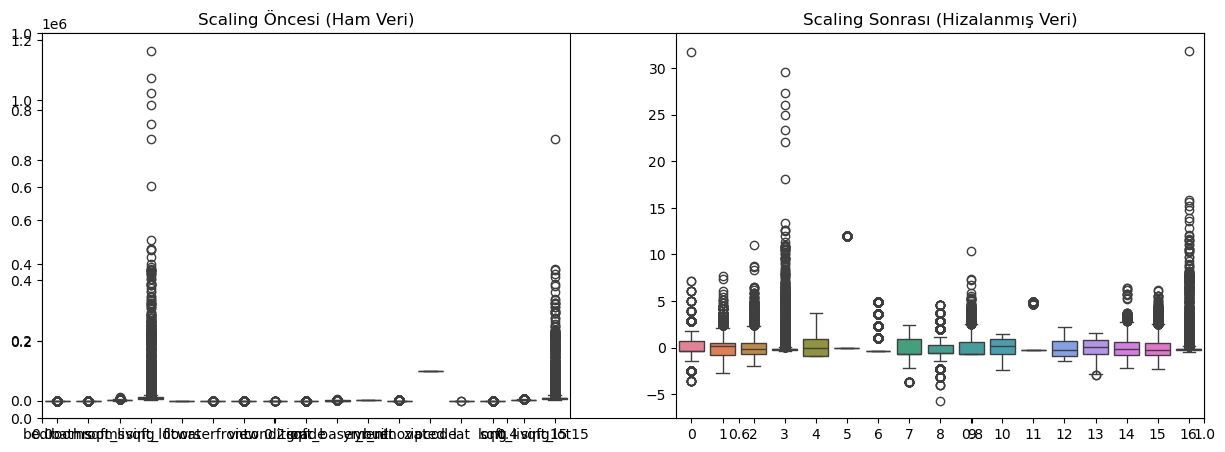

In [49]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('Scaling Öncesi (Ham Veri)')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('Scaling Sonrası (Hizalanmış Veri)')
plt.show()

In [52]:
def compare_models(X_train, y_train, X_test, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge": Ridge(),
        "ElasticNet": ElasticNet()
    }
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"--- {name} ---")
        print(f"MAE: {mae:.2f}")
        print(f"MSE: {mse:.2f}")
        print(f"R2 Score: {r2:.4f}\n")

In [53]:
compare_models(X_train_scaled, y_train, X_test_scaled, y_test)

--- Linear Regression ---
MAE: 126536.83
MSE: 44151294752.41
R2 Score: 0.7048

--- Lasso ---
MAE: 126536.37
MSE: 44151397452.13
R2 Score: 0.7048

--- Ridge ---
MAE: 126533.80
MSE: 44151643354.40
R2 Score: 0.7048

--- ElasticNet ---
MAE: 127372.09
MSE: 51258941970.30
R2 Score: 0.6573



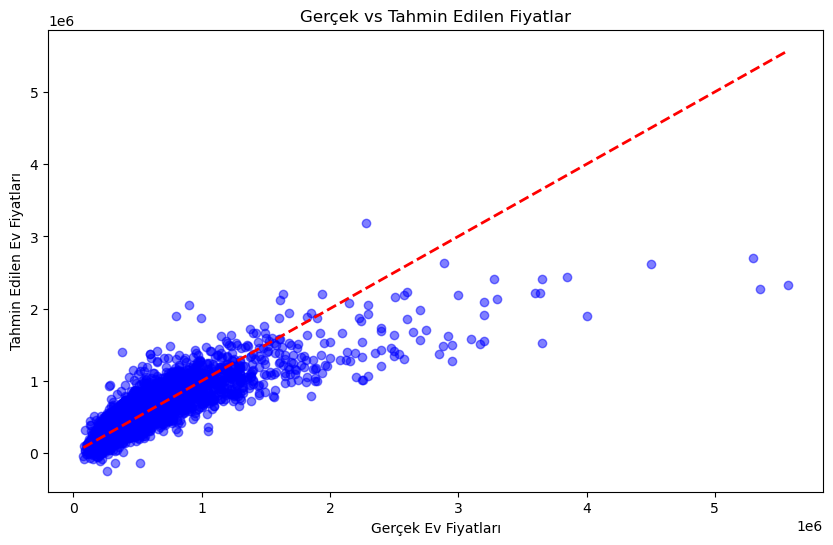

In [54]:
model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # İdeal çizgi
plt.xlabel("Gerçek Ev Fiyatları")
plt.ylabel("Tahmin Edilen Ev Fiyatları")
plt.title("Gerçek vs Tahmin Edilen Fiyatlar")
plt.show()

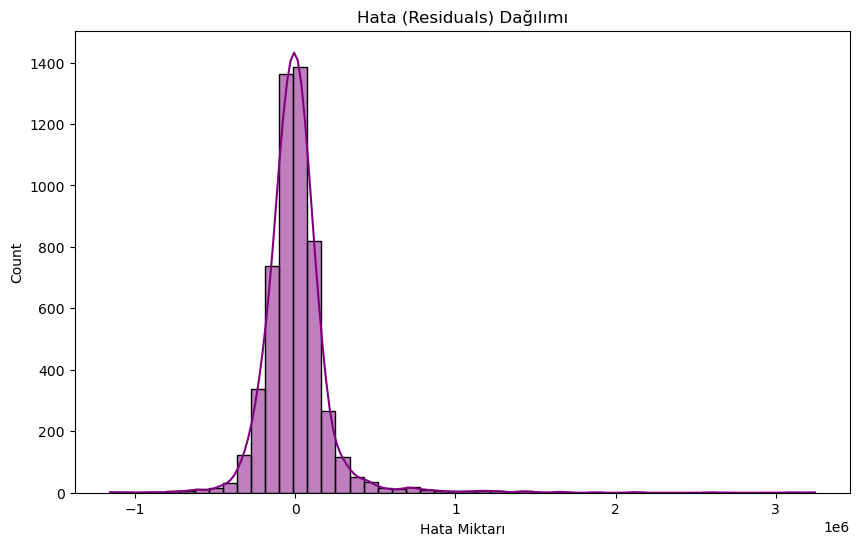

In [55]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=50, kde=True, color='purple')
plt.title("Hata (Residuals) Dağılımı")
plt.xlabel("Hata Miktarı")
plt.show()

/var/folders/kg/dbqqbcbx677f_02yzmhmctxc0000gn/T/ipykernel_63979/3320562776.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_df['Katsayı (Coefficient)'], y=coef_df.index, palette='viridis')


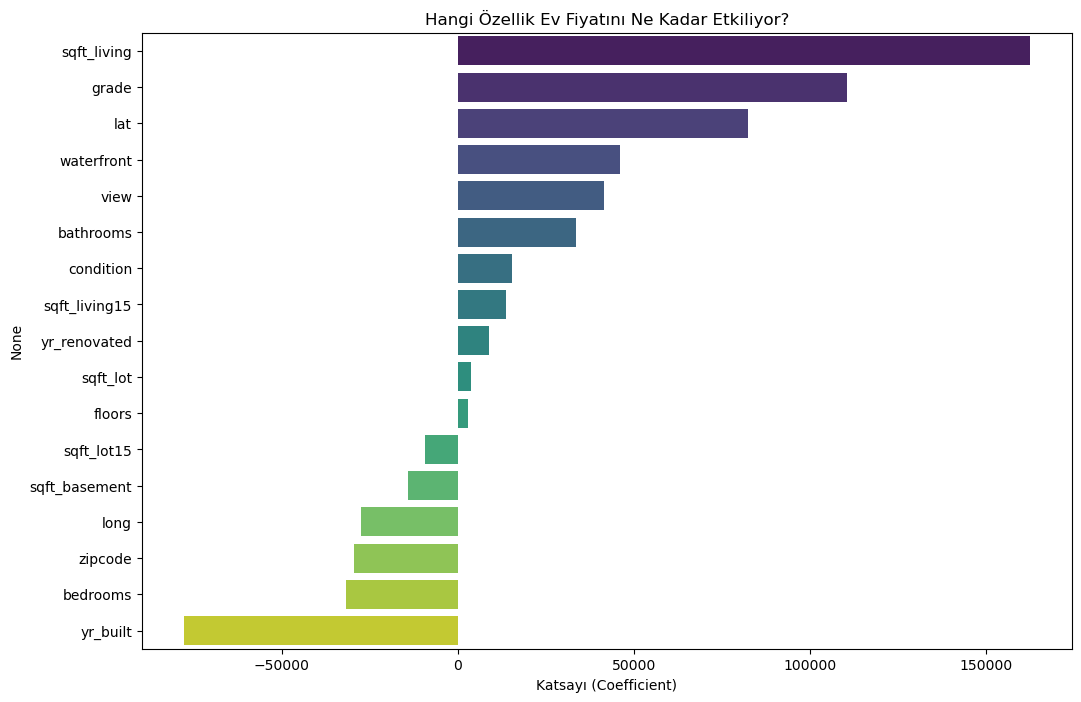

In [57]:
coef_df = pd.DataFrame(model.coef_, X_train.columns, columns=['Katsayı (Coefficient)'])
coef_df = coef_df.sort_values(by='Katsayı (Coefficient)', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=coef_df['Katsayı (Coefficient)'], y=coef_df.index, palette='viridis')
plt.title("Hangi Özellik Ev Fiyatını Ne Kadar Etkiliyor?")
plt.show()

In [58]:
from sklearn.linear_model import LassoCV

In [59]:
#çapraz doğrulama yapıyoruz
lassocv = LassoCV(cv=5, max_iter=10000)
lassocv.fit(X_train_scaled, y_train)
print(f"Makinenin Seçtiği En İyi Alpha: {lassocv.alpha_}")

Makinenin Seçtiği En İyi Alpha: 252.5407483955842


In [60]:
y_pred_final = lassocv.predict(X_test_scaled)

In [61]:
print(f"LassoCV Final R2 Skoru: {r2_score(y_test, y_pred_final):.4f}")
print(f"LassoCV Final MAE: {mean_absolute_error(y_test, y_pred_final):.2f}")

LassoCV Final R2 Skoru: 0.7047
LassoCV Final MAE: 126428.37
